In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [260]:
#Importing The Dataset
df = pd.read_csv('MSFT.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-14,241.990005,243.910004,239.210007,241.550003,239.238754,31123300
1,2022-11-15,245.660004,247.000000,240.029999,241.970001,239.654739,31390100
2,2022-11-16,242.789993,243.800003,240.419998,241.729996,240.091751,24093300
3,2022-11-17,237.779999,243.250000,237.630005,241.679993,240.042084,23123500
4,2022-11-18,243.509995,243.740005,239.029999,241.220001,239.585220,27613500


In [261]:
#Checking The Shape Of The Dataset
df.shape

(251, 7)

In [262]:
#Checking The Null Values
df.isnull().sum().any()

False

In [263]:
#Columns In The Dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [264]:
df.isnull().values.any()

False

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [266]:
print(df.corr())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.997597  0.998089  0.994779   0.994838 -0.149390
High       0.997597  1.000000  0.997770  0.998002   0.997978 -0.128861
Low        0.998089  0.997770  1.000000  0.997924   0.997963 -0.168743
Close      0.994779  0.998002  0.997924  1.000000   0.999958 -0.149375
Adj Close  0.994838  0.997978  0.997963  0.999958   1.000000 -0.151813
Volume    -0.149390 -0.128861 -0.168743 -0.149375  -0.151813  1.000000


<ipython-input-266-23236a4e6045>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<ipython-input-267-39fcd92b18e1>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



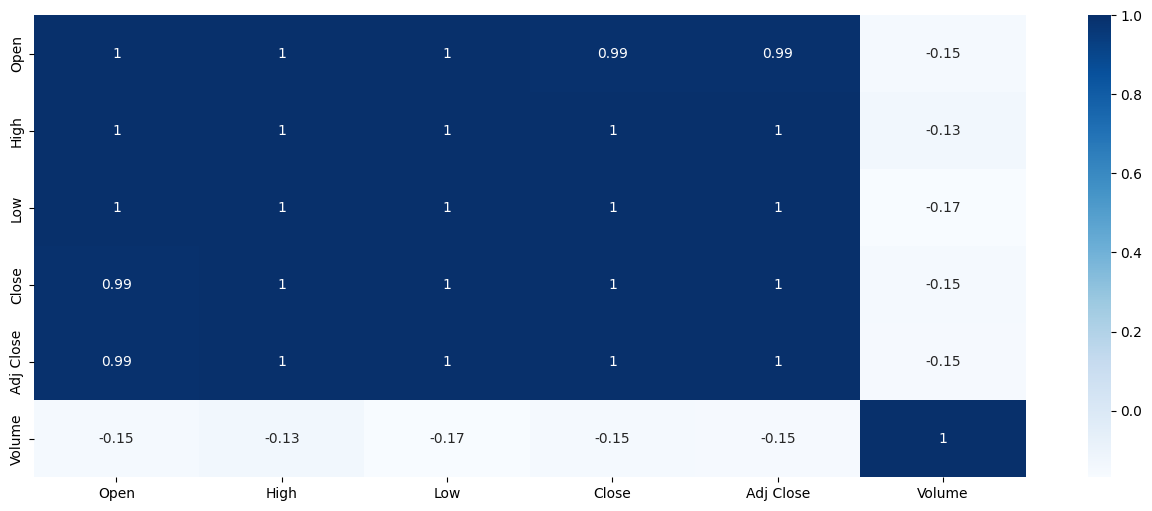

In [267]:
#Corelation Between The Coulumns
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),cmap='Blues', annot=True)
plt.show()

<Axes: ylabel='Low'>

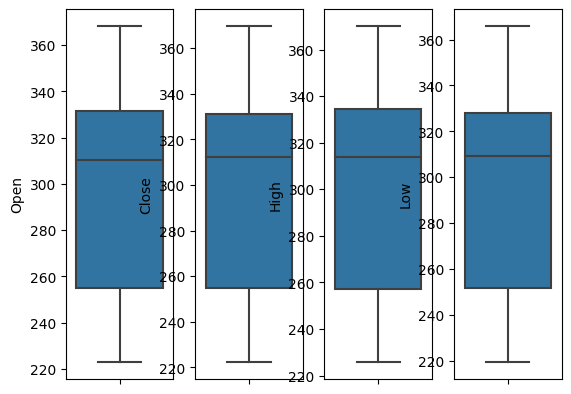

In [268]:
#Checking the Outliers
f, axes = plt.subplots(1,4)
sns.boxplot(y='Open', data=df, ax=axes[0])
sns.boxplot(y='Close', data=df, ax=axes[1])
sns.boxplot(y='High', data=df, ax=axes[2])
sns.boxplot(y='Low', data=df, ax=axes[3])

In [269]:
#Plotting The Graph Of The Dataset
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                       open=df['Open'],high=df['High'],
                                       low=df['Low'], close=df["Close"])])
figure.update_layout(title='Tesla Stock Price Analysis', xaxis_rangeslider_visible=False)

##Split The Dataset

In [270]:
X = df[['Open','High','Low','Volume']].values
y = df["Close"].values

Split the data 80% and 20% testing

In [271]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [272]:
print('Train',X_train.shape)
print('Test',X_test.shape)

Train (200, 4)
Test (51, 4)


In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

regressor = LinearRegression()
model=regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [274]:
predicted = regressor.predict(X_test)
print(predicted)

[333.2220471  307.90675212 280.69356719 340.1259738  333.93192074
 329.19082126 331.27040897 272.78038035 268.8698537  333.11935418
 334.26667067 330.98267635 284.78492689 323.12681611 306.35263122
 250.12643043 334.53133675 331.00871114 327.54190094 288.83687744
 338.50594946 239.77968011 329.67338293 295.81960308 328.7133631
 277.38934579 248.56789219 261.58939403 356.73336881 230.85337375
 321.9255518  255.45114082 277.98183909 328.52003875 335.77514963
 335.55843809 343.89304965 244.40610885 249.10873534 312.9734202
 309.66762769 253.64938009 288.52213528 321.98754164 278.66391431
 284.78904156 327.94082948 233.11678925 264.84247236 330.62183789
 251.30238859]


In [275]:
predicted.shape

(51,)

In [276]:
#Actual Price VS Predicted Price
dframe = pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual_Price':y_test,"Predicted_price":predicted})
print(dfr)

    Actual_Price  Predicted_price
0     334.570007       333.222047
1     310.109985       307.906752
2     280.510010       280.693567
3     338.149994       340.125974
4     333.559998       333.931921
5     332.470001       329.190821
6     328.600006       331.270409
7     276.200012       272.780380
8     269.320007       268.869854
9     334.290009       333.119354
10    335.049988       334.266671
11    332.059998       330.982676
12    285.760010       284.784927
13    321.859985       323.126816
14    304.399994       306.352631
15    251.110001       250.126430
16    334.269989       334.531337
17    329.910004       331.008711
18    327.500000       327.541901
19    287.179993       288.836877
20    337.989990       338.505949
21    240.220001       239.779680
22    327.890015       329.673383
23    295.369995       295.819603
24    327.760010       328.713363
25    276.380005       277.389346
26    247.490005       248.567892
27    258.350006       261.589394
28    356.5299

Stats for Predicted

In [277]:
dfr.head(20)

,Actual_Price,Predicted_price
0,334.570007,333.222047
1,310.109985,307.906752
2,280.510010,280.693567
3,338.149994,340.125974
4,333.559998,333.931921
5,332.470001,329.190821
6,328.600006,331.270409
7,276.200012,272.780380
8,269.320007,268.869854
9,334.290009,333.119354


In [278]:
import scipy.stats

p_value = scipy.stats.norm.sf(abs(1.67))
print('p value is :' + str(p_value))

p value is :0.04745968180294733


In [279]:
from sklearn.metrics import confusion_matrix, accuracy_score
regression_confidence = regressor.score(X_test,y_test)
print("Linear Regression Confidence", regression_confidence)

Linear Regression Confidence 0.9978136570514007


In [280]:
x2= abs(predicted-y_test)
y2= 100*(x2/ y_test)
accuracy = 100-np.mean(y2)
print("Accuracy:", round(accuracy, 2), '%')

Accuracy: 99.52 %


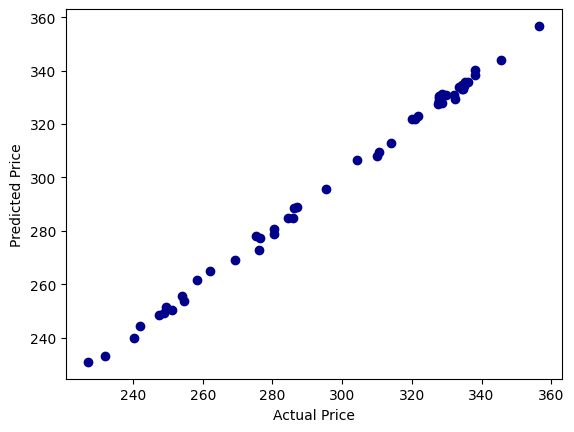

In [281]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_price, color="Darkblue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

<Axes: >

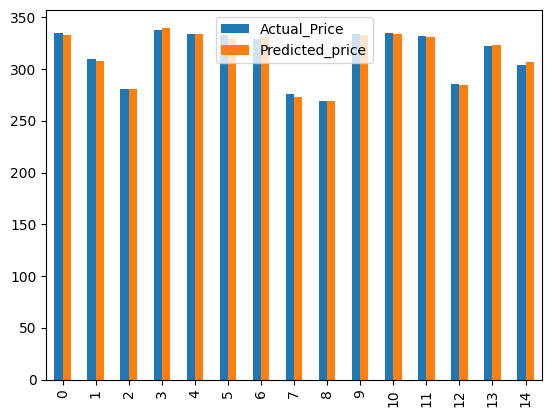

In [282]:
#Plotting the First 15 Predicted and Actual Price
graph = dfr.head(15)
graph.plot(kind='bar')

---------------------------------------------------------------------
    Actual_Price  Predicted_price
0     334.570007       333.463003
1     310.109985       309.995987
2     280.510010       280.013004
3     338.149994       338.054996
4     333.559998       333.560999
5     332.470001       332.408002
6     328.600006       330.191000
7     276.200012       272.350006
8     269.320007       270.051007
9     334.290009       333.982007
10    335.049988       334.916992
11    332.059998       332.059998
12    285.760010       285.549005
13    321.859985       322.251993
14    304.399994       304.833997
15    251.110001       250.626001
16    334.269989       333.986996
17    329.910004       329.778003
18    327.500000       327.786999
19    287.179993       288.094995
20    337.989990       338.121997
21    240.220001       239.680000
22    327.890015       330.230008
23    295.369995       296.731992
24    327.760010       328.410007
25    276.380005       276.799005
26    247.49

<Axes: >

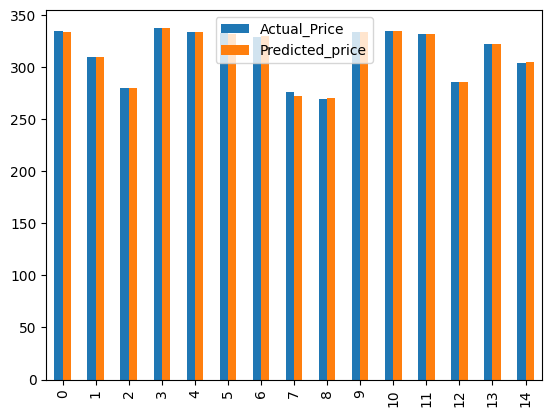

In [283]:
from sklearn.ensemble import RandomForestRegressor
rfr_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr_regressor.fit(X, y)
rfr_predicted = rfr_regressor.predict(X_test)
#print(rfr_predicted)
print("---------------------------------------------------------------------")
#Actual Price VS Predicted Price
drframe = pd.DataFrame(y_test,rfr_predicted)
drfr=pd.DataFrame({'Actual_Price':y_test,"Predicted_price":rfr_predicted})
print(drfr)
print("---------------------------------------------------------------------")
from sklearn.metrics import confusion_matrix, accuracy_score
rfr_regression_confidence = rfr_regressor.score(X_test,y_test)
print("Random Forest Regression Confidence", rfr_regression_confidence)
print("---------------------------------------------------------------------")
x4= abs(rfr_predicted-y_test)
y4= 100*(x4/ y_test)
rfr_accuracy = 100-np.mean(y4)
print("Accuracy:", round(rfr_accuracy, 2), '%')
print("---------------------------------------------------------------------")
#Plotting the First 15 Predicted and Actual Price
graph = drfr.head(15)
graph.plot(kind='bar')

---------------------------------------------------------------------
    Actual_Price  Predicted_price
0     334.570007       334.570007
1     310.109985       310.109985
2     280.510010       280.510010
3     338.149994       338.149994
4     333.559998       333.559998
5     332.470001       332.470001
6     328.600006       328.600006
7     276.200012       276.200012
8     269.320007       269.320007
9     334.290009       334.290009
10    335.049988       335.049988
11    332.059998       332.059998
12    285.760010       285.760010
13    321.859985       321.859985
14    304.399994       304.399994
15    251.110001       251.110001
16    334.269989       334.269989
17    329.910004       329.910004
18    327.500000       327.500000
19    287.179993       287.179993
20    337.989990       337.989990
21    240.220001       240.220001
22    327.890015       327.890015
23    295.369995       295.369995
24    327.760010       327.760010
25    276.380005       276.380005
26    247.49

<Axes: >

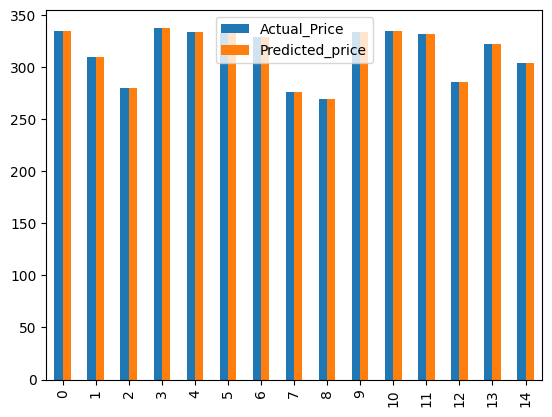

In [284]:
from sklearn.tree import DecisionTreeRegressor
dtr_regressor = DecisionTreeRegressor(random_state = 0)
dtr_regressor.fit(X, y)
dtr_predicted = dtr_regressor.predict(X_test)
#print(dtr_predicted)
print("---------------------------------------------------------------------")
#Actual Price VS Predicted Price
dtframe = pd.DataFrame(y_test,dtr_predicted)
dtfr=pd.DataFrame({'Actual_Price':y_test,"Predicted_price":dtr_predicted})
print(dtfr)
print("---------------------------------------------------------------------")
from sklearn.metrics import confusion_matrix, accuracy_score
dtr_regression_confidence = dtr_regressor.score(X_test,y_test)
print("Decision Tree Regression Confidence", dtr_regression_confidence)
print("---------------------------------------------------------------------")
x3= abs(dtr_predicted-y_test)
y3= 100*(x3/ y_test)
dtr_accuracy = 100-np.mean(y3)
print("Accuracy:", round(dtr_accuracy, 2), '%')
print("---------------------------------------------------------------------")
#Plotting the First 15 Predicted and Actual Price
graph = dtfr.head(15)
graph.plot(kind='bar')

---------------------------------------------------------------------
    Actual_Price  Predicted_price
0     334.570007       313.468043
1     310.109985       307.947072
2     280.510010       312.926486
3     338.149994       317.426368
4     333.559998       312.903531
5     332.470001       311.709960
6     328.600006       315.445087
7     276.200012       301.505971
8     269.320007       310.008449
9     334.290009       314.473743
10    335.049988       318.004049
11    332.059998       317.339391
12    285.760010       315.342417
13    321.859985       318.018225
14    304.399994       314.882136
15    251.110001       313.133590
16    334.269989       316.678791
17    329.910004       317.316929
18    327.500000       310.896789
19    287.179993       312.373341
20    337.989990       319.545812
21    240.220001       305.435775
22    327.890015       304.041383
23    295.369995       303.673532
24    327.760010       311.928693
25    276.380005       311.601609
26    247.49

<Axes: >

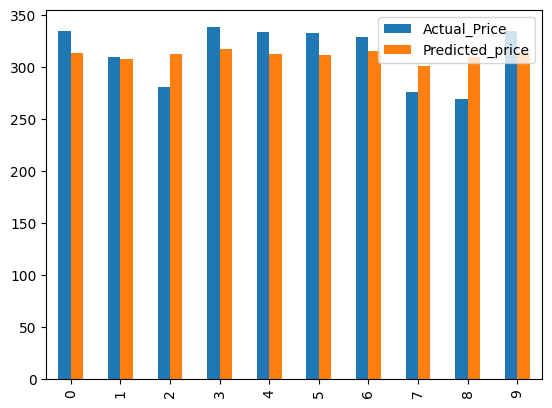

In [285]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X, y)
svr_predicted = svr_regressor.predict(X_test)
#print(svr_predicted)
print("---------------------------------------------------------------------")
#Actual Price VS Predicted Price
dsframe = pd.DataFrame(y_test,svr_predicted)
dsfr=pd.DataFrame({'Actual_Price':y_test,"Predicted_price":svr_predicted})
print(dsfr)
print("---------------------------------------------------------------------")
from sklearn.metrics import confusion_matrix, accuracy_score
svr_regression_confidence = svr_regressor.score(X_test,y_test)
print("Random Forest Regression Confidence", svr_regression_confidence)
print("---------------------------------------------------------------------")
x5= abs(svr_predicted-y_test)
y5= 100*(x5/ y_test)
svr_accuracy = 100-np.mean(y5)
print("Accuracy:", round(svr_accuracy, 2), '%')
print("---------------------------------------------------------------------")
#Plotting the First 15 Predicted and Actual Price
graph = dsfr.head(10)
graph.plot(kind='bar')